Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
10318.887998050583
10113.260572622785
9917.846930243371
9732.139733156222
9555.656844025702
9387.940074184353
9228.553994057504
9077.08480267635
8933.1392533444
8796.343632668135
8666.342790301098
8542.799216882411
8425.392167775934
8313.816830334737
8207.783532529333
8107.0169908846665
8011.255595773608
7920.250732211159
7833.76613438619
7751.577272254706
7673.470768602244
7599.2438450618665
7528.703795649423
7461.667486449427
7397.960880152341
7337.418584209068
7279.883421429462
7225.206021909984
7173.244435231081
7123.863761917487
7076.93580320455
7032.338728201323
6989.95675758631
6949.67986301464
6911.4034814562065
6875.028243723269
6840.45971648247
6807.608157081698
6776.388280555113
6746.719038201509
6718.523407161052
6691.728190444205
6666.263826893505
6642.064210585
6619.066519200256
6597.21105092354
6576.441069440535
6556.702656636346
6537.944572610

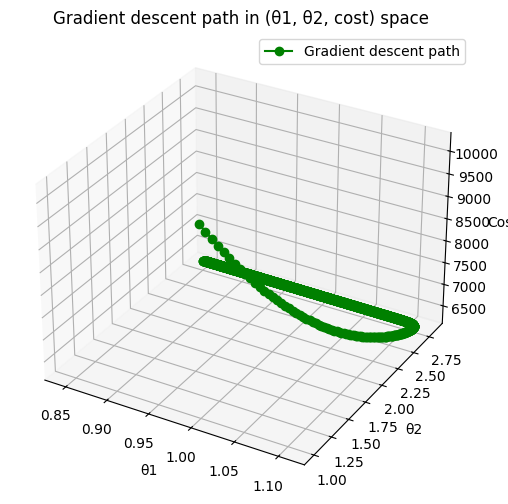

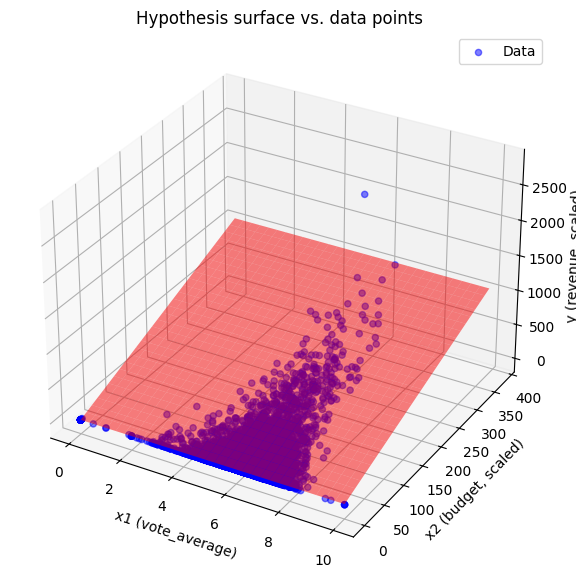

In [40]:
#import libraries for analyzing arrays and importing data
import numpy as np
import pandas as pd

#read the file and turn columns into arrays
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/tmdb_5000_movies.csv")
#gets values of features and y along with scales money to millions (could not find another way to fix)
x1 = df["vote_average"].to_numpy().astype(float)
x2 = df["budget"].to_numpy().astype(float) / 1e6
y  = df["revenue"].to_numpy().astype(float) / 1e6

#set initial values
theta0=0
theta1=1
theta2=1
alpha=0.00001

theta_history = []
#loop over to find equation for y_hat
for i in range (3000):
  #Find hypothesis
  y_hat = theta0 + theta1 * x1 + theta2 * x2

  #calulate errors
  errors = y_hat - y

  #calculate the cost
  m = len(y)
  cost = np.dot(errors, errors) / (2*m)
  print(cost)

  #finds initial cost
  if (i==0):
    initial_cost=cost

  #calculates gradients
  gradient0=(1/m)*np.sum(errors)
  gradient1=(1/m)*np.sum(errors*x1)
  gradient2=(1/m)*np.sum(errors*x2)

  #adds cosst to plot later
  theta_history.append((theta1, theta2, cost))

  #adjuts parameters
  theta0=theta0-alpha*gradient0
  theta1=theta1-alpha*gradient1
  theta2=theta2-alpha*gradient2

#prints initial and final values
print()
print("Initial theta0=0")
print("Initial theta1=1")
print("Initial theta2=1")
print("Initial cost=", initial_cost)
print()
print("Final theta0=", theta0)
print("Final theta1=", theta1)
print("Final theta2=", theta2)
print("Final cost=", cost)


#plots grap for hypthesis
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

theta1_vals, theta2_vals, costs = zip(*theta_history)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(theta1_vals, theta2_vals, costs, marker='o', color='green', label="Gradient descent path")

#labels
ax.set_xlabel("θ1")
ax.set_ylabel("θ2")
ax.set_zlabel("Cost")
ax.set_title("Gradient descent path in (θ1, θ2, cost) space")
ax.legend()

plt.show()

#graphs plots for cost
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, c='blue', marker='o', alpha=0.5, label="Data")

x1_range = np.linspace(min(x1), max(x1), 30)
x2_range = np.linspace(min(x2), max(x2), 30)
X1, X2 = np.meshgrid(x1_range, x2_range)

#y_hat on graph
Y_hat = theta0 + theta1*X1 + theta2*X2

ax.plot_surface(X1, X2, Y_hat, color='red', alpha=0.5)

#labels
ax.set_xlabel("x1 (vote_average)")
ax.set_ylabel("x2 (budget, scaled)")
ax.set_zlabel("y (revenue, scaled)")
ax.set_title("Hypothesis surface vs. data points")
ax.legend()

plt.show()


